# STEP 1
Importing required libraries

In [1]:
from model import avion_model 
from image import avion_image_tools
from preprocessing import avion_preprocessing
import cv2
import numpy as np

# STEP 2
Preparing the image preprocessing functions

In [2]:
enhancer=avion_image_tools()
def imagepreprocess(image):
    converted=cv2.cvtColor(enhancer.enhance_image_clahe(image,3,demo=0,invert=0),cv2.COLOR_GRAY2BGR)
    return converted

# STEP 3
Preprocessing, reading and visualizing the data

In [2]:
preprocessor=avion_preprocessing("COVID-19_Radiography_Dataset_Splitted",True)


In [3]:
preprocessor.summary_of_data()

COVID-19_Radiography_Dataset_Splitted/train/Viral Pneumonia/Viral Pneumonia-770.png
train:
Data Type: png
        Image shape: (299, 299, 3)
        Number of data :
                    
	class 0: 941
	class 1: 4208
	class 2: 7134
	class 3: 2531


COVID-19_Radiography_Dataset_Splitted/val/Viral Pneumonia/Viral Pneumonia-1186.png
val:
Data Type: png
        Image shape: (299, 299, 3)
        Number of data :
                    
	class 0: 201
	class 1: 901
	class 2: 1528
	class 3: 542


COVID-19_Radiography_Dataset_Splitted/test/Viral Pneumonia/Viral Pneumonia-980.png
test:
Data Type: png
        Image shape: (299, 299, 3)
        Number of data :
                    
	class 0: 203
	class 1: 903
	class 2: 1530
	class 3: 543




In [5]:
traindata,validationdata,testdata=preprocessor.get_data((224,224),'rgb',16,42,imagepreprocess)


Found 14814 images belonging to 4 classes.
Found 3172 images belonging to 4 classes.
Found 3179 images belonging to 4 classes.


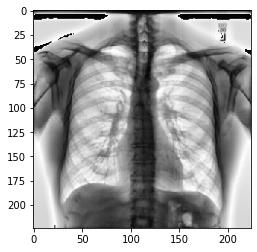

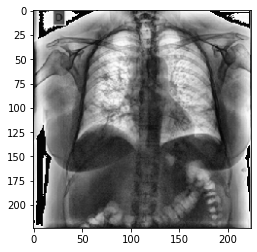

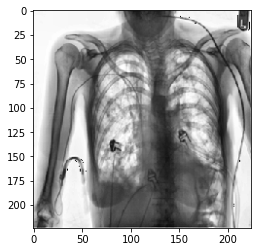

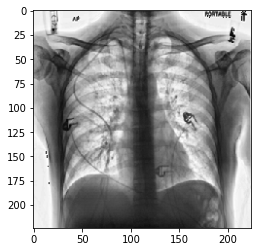

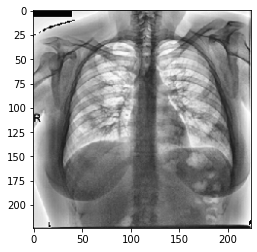

In [6]:
from matplotlib import pyplot as plt
for _ in range(5):
    img, label = traindata.next()
    plt.imshow(img[0].astype('uint8'))
    plt.show()

# STEP 4
Preparing and compiling the model

In [7]:
model=avion_model()
model.set_model_parameters('vgg16',(224,224,3),14814,3172,number_of_classes=4,batch_size=32,epochs=10)
vggModel=model.build_model()

2022-02-12 00:54:52.191917: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-12 00:54:52.192034: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [8]:
vggModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 firstImage (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584

In [9]:
model.model_compile()

# STEP 5
Training

In [10]:
model.model_fit(traindata,validationdata)

2022-02-12 00:54:54.573892: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2022-02-12 00:54:54.792013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


926/926 [==============================] - ETA: 0s - loss: 0.6258 - categorical_accuracy: 0.7652 - acc: 0.7652

2022-02-12 00:59:44.935189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


926/926 [==============================] - 353s 381ms/step - loss: 0.6258 - categorical_accuracy: 0.7652 - acc: 0.7652 - val_loss: 0.5657 - val_categorical_accuracy: 0.7866 - val_acc: 0.7866
Epoch 2/10
926/926 [==============================] - 384s 415ms/step - loss: 0.4393 - categorical_accuracy: 0.8374 - acc: 0.8374 - val_loss: 0.4100 - val_categorical_accuracy: 0.8556 - val_acc: 0.8556
Epoch 3/10
926/926 [==============================] - 389s 420ms/step - loss: 0.4010 - categorical_accuracy: 0.8495 - acc: 0.8495 - val_loss: 0.4275 - val_categorical_accuracy: 0.8427 - val_acc: 0.8427
Epoch 4/10
926/926 [==============================] - 397s 428ms/step - loss: 0.3646 - categorical_accuracy: 0.8655 - acc: 0.8655 - val_loss: 0.3637 - val_categorical_accuracy: 0.8610 - val_acc: 0.8610
Epoch 5/10
926/926 [==============================] - 391s 423ms/step - loss: 0.3425 - categorical_accuracy: 0.8719 - acc: 0.8719 - val_loss: 0.3388 - val_categorical_accuracy: 0.8707 - val_acc: 0.8707
E

KeyboardInterrupt: 